## Load necessary libraries

In [11]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from models import VAE
from dataset import FontsLoader

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

Device: cpu


### Load example data

In [12]:
dataset = FontsLoader._get_set()

## Load Model

In [24]:
net = VAE()
net.load_state_dict(
    torch.load(open('./checkpoints/vae_30_epochs_loss_14.pth', 'rb'), map_location=device)
)
net.eval()

VAE(
  (encoder): ResEncoder(
    (conv_1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv_2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (conv_3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (res_stack): ResStack(
      (res_layers): ModuleList(
        (0): ResBlock(
          (residual): Sequential(
            (0): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): ReLU(inplace=True)
            (2): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (3): ReLU(inplace=True)
          )
        )
        (1): ResBlock(
          (residual): Sequential(
            (0): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): ReLU(inplace=True)
            (2): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (3): ReLU(inplace=True)
          )
        )
      )
    )
 

In [83]:
index = 200
mu, logvar, z, recon = net(dataset[index]['image'].unsqueeze(0))

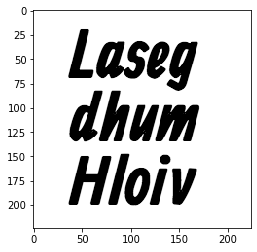

In [84]:
plt.imshow(dataset[index]['image'].squeeze(), cmap='gray');

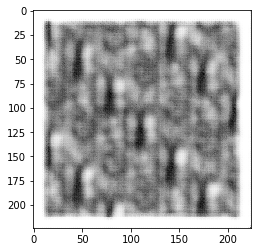

In [85]:
plt.imshow(recon[0].squeeze().detach().numpy(), cmap='gray');

In [86]:
net.loss_function(dataset[index]['image'].unsqueeze(0), recon, mu, logvar).item()

0.7183791399002075